### Importing required Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Understanding Data

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
#Number of employees left the job
df[df.left==1].shape

(3571, 10)

In [6]:
#Number of employees kept the job
df[df.left==0].shape

(11428, 10)

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


 Attributes on which we can take as Independent variables : <br>Satisfacion Level : Employee with 🔼 satisfaction are less likely to leave <br>Average_montly_hours : Employee with 🔽 monthly hour are less likely to leave <br>Promotion_last_5years : Employee who are promoted in last 5 years have less chances of leaving

Now, to check whether can we take Department and Salary attribute as Independent Variables

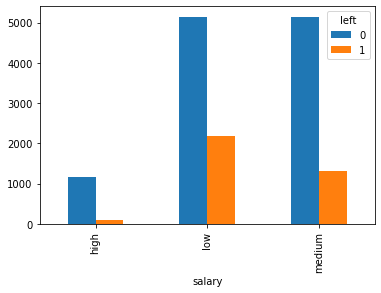

In [8]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

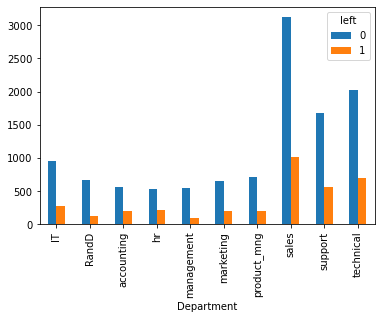

In [9]:
pd.crosstab(df.Department,df.left).plot(kind = 'bar')

#### Conclusion : <br><br>We can take - "satisfaction_level", "average_montly_hours", "promotion_last_5years" and "salary" as our Independent Variables

### Data Cleaning 

In [10]:
df1 = df.drop(['Work_accident','time_spend_company', 'number_project', 'last_evaluation', 'Department'],axis='columns')
df1.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [11]:
n_sal = preprocessing.LabelEncoder()
df1['salary'] = n_sal.fit_transform(df1['salary']) 
df1.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,1
1,0.80,262,1,0,2
2,0.11,272,1,0,2
3,0.72,223,1,0,1
4,0.37,159,1,0,1


### Data Visualization

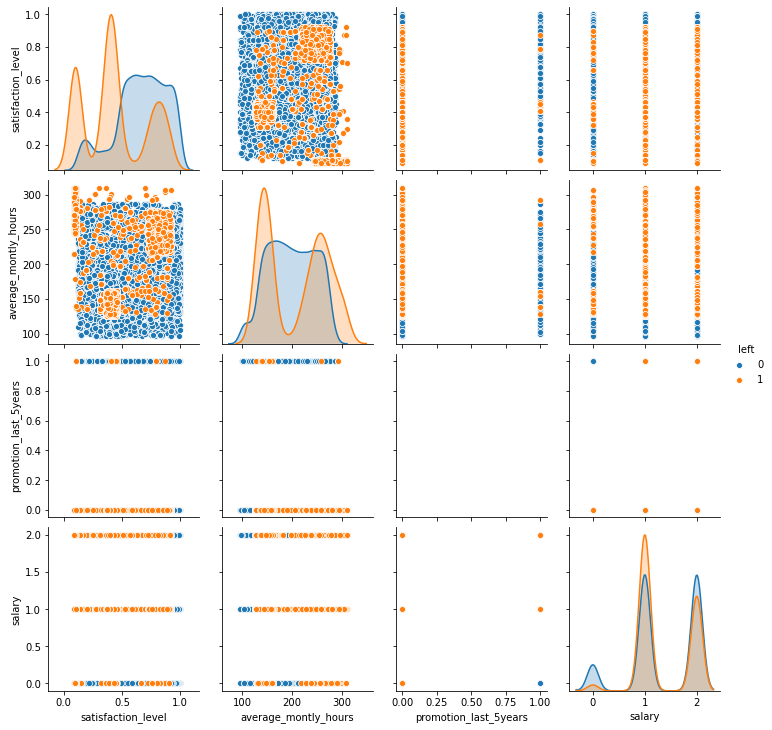

In [13]:
sns.pairplot(df1,hue='left')
warnings.filterwarnings("ignore")

In [14]:
# To view impact of different attribute separately 

# plt.scatter(df1.satisfaction_level,df1.left,marker='+',color='blue')

# plt.scatter(df1.average_montly_hours,df1.left,marker='+',color='blue')

# plt.scatter(df1.promotion_last_5years,df1.left,marker='+',color='blue')

# plt.scatter(df1.salary,df1.left,marker='+',color='blue')

### Feature and Lable set

In [15]:
X = df1[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']].values
Y = df1['left'].values

In [16]:
X[:5]

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       [7.20e-01, 2.23e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.59e+02, 0.00e+00, 1.00e+00]])

In [17]:
Y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Train Test Split 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (10499, 4) (10499,)
Test set: (4500, 4) (4500,)


### Modeling

In [23]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X_train, Y_train)

LogisticRegression()

### Prediction

In [24]:
p =  m.predict(X_test)
print ("Prediction = ", p[:5])
print ("True Value = ", Y_test [:5])

Prediction =  [0 0 0 0 1]
True Value =  [1 0 0 0 0]


### Accuracy

In [25]:
print("Accuracy of Logistic Regression :", metrics.accuracy_score(Y_test,p))
# m.score(X_test, Y_test)

Accuracy of Logistic Regression : 0.7728888888888888
